In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

import random
from scipy.stats import norm

### Loading Data in from Kaggle API

f51999f5f297523ab16349d4112bd4ff

In [2]:
od.download("https://www.kaggle.com/datasets/davidcariboo/player-scores")

Skipping, found downloaded files in "./player-scores" (use force=True to force download)


### Reading in the Kaggle tables for Transfer Markt

In [3]:
valuations = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/player_valuations.csv')
players = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/players.csv')
competitions = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/competitions.csv')
clubs = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/clubs.csv')

In [4]:
players= pd.read_csv(players)
valuations= pd.read_csv(valuations)
competitions= pd.read_csv(competitions)
clubs= pd.read_csv(clubs)

In [5]:
#current players only
still_playing = players['last_season'].isin([2018,2019,2020,2021, 2022])
players = players[still_playing]
players.head()

,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,agent_name,contract_expiration_date,domestic_competition_id,club_name,image_url,last_season,url
9645,96472,Ralf Seuntjens,1426,Vvv Venlo,1426,Netherlands,Netherlands,1989-04-17,Attack,Centre-Forward,...,194,495000.0,675000.0,Sportconsult Nederland,2024-01-31,NL1,vvv-venlo,NaN,2018,https://www.transfermarkt.co.uk/ralf-seuntjens...
9646,234807,Martin Samuelsen,1426,Vvv Venlo,1426,Norway,Norway,1997-04-17,Attack,Left Winger,...,189,450000.0,720000.0,Jim Solbakken,2022-12-31,NL1,vvv-venlo,NaN,2018,https://www.transfermarkt.co.uk/martin-samuels...
9647,118292,Julian Michel,498,Ksc Lokeren,498,France,France,1992-02-19,Midfield,Central Midfield,...,180,NaN,1350000.0,Eleven Management,NaN,BE1,ksc-lokeren,NaN,2018,https://www.transfermarkt.co.uk/julian-michel/...
9648,12974,Killian Overmeire,498,Ksc Lokeren,498,Belgium,Belgium,1985-12-06,Midfield,Defensive Midfield,...,188,NaN,1800000.0,PROFI-MANAGEMENT,NaN,BE1,ksc-lokeren,NaN,2018,https://www.transfermarkt.co.uk/killian-overme...
9649,70170,Lukas Marecek,498,Ksc Lokeren,498,Czech Republic,CSSR,1990-04-17,Midfield,Defensive Midfield,...,182,180000.0,1350000.0,NaN,2022-06-30,BE1,ksc-lokeren,NaN,2018,https://www.transfermarkt.co.uk/lukas-marecek/...


In [6]:
valuations.head()

,date,datetime,dateweek,player_id,current_club_id,market_value,player_club_domestic_competition_id
0,2013-07-22,2013-07-22,2013-07-22,254016,855,90000,FR1
1,2014-01-14,2014-01-14,2014-01-13,254016,855,90000,FR1
2,2008-08-25,2008-08-25,2008-08-25,51053,23,90000,L1
3,2011-05-30,2011-05-30,2011-05-30,51053,23,90000,L1
4,2011-08-26,2011-08-26,2011-08-22,51053,23,225000,L1


In [7]:
joined = pd.merge(left = players, right = valuations, how = 'inner', on = 'player_id' )
#firsttierplayersonly (revise later if no players for country)


In [8]:
joined = pd.merge(left = joined, right = clubs, how = 'inner', on = 'club_id' )
joined = pd.merge(left = joined, right = competitions, how = 'inner', left_on='player_club_domestic_competition_id', right_on='competition_id' )

In [9]:
#first_tier = joined['sub_type'] == 'first_tier'
toptierplayers = joined

In [10]:
toptierplayers['date'] = pd.to_datetime(toptierplayers['date'], errors='coerce')

In [11]:
toptierplayers['Year']= toptierplayers['date'].dt.year
grouped_multiple = toptierplayers.groupby(['player_id', 'Year']).agg({'market_value': ['mean']})
grouped_multiple.columns = ['market_value_mean']
grouped_multiple['market_value_mean']= grouped_multiple['market_value_mean'].astype(int)
players_avg_value_per_year = grouped_multiple.reset_index()
players_avg_value_per_year.head()

,player_id,Year,market_value_mean
0,532,2004,8550000
1,532,2005,9900000
2,532,2006,10125000
3,532,2007,9675000
4,532,2008,6900000


In [12]:
list=[x for x in range(2003, 2022+1)]
WorldCupList = {'World Cup': ['2006','2006','2006','2006', '2010', '2010','2010','2010','2014','2014','2014','2014','2018','2018','2018','2018','2022','2022','2022','2022'], 'Year': list}
WorldCupYears = pd.DataFrame(WorldCupList)  

In [13]:
players_avg_value_per_wc = pd.merge(players_avg_value_per_year, WorldCupYears, left_on='Year', right_on='Year')
players_avg_value_per_wc = players_avg_value_per_wc.groupby(['player_id', 'World Cup']).agg({'market_value_mean': ['mean', 'min', 'max']})
players_avg_value_per_wc.columns = ['market_value_mean', 'market_value_min', 'market_value_max']
players_avg_value_per_wc['market_value_mean']= players_avg_value_per_wc['market_value_mean'].astype(int)
players_avg_value_per_wc = players_avg_value_per_wc.reset_index()

In [14]:
players_avg_value_per_wc = players_avg_value_per_wc.groupby(['player_id', 'World Cup']).agg({'market_value_mean': ['mean', 'min', 'max']})
players_avg_value_per_wc.columns = ['market_value_mean', 'market_value_min', 'market_value_max']
players_avg_value_per_wc = players_avg_value_per_wc.reset_index()

In [15]:
players_avg_value_per_wc

,player_id,World Cup,market_value_mean,market_value_min,market_value_max
0,532,2006,9525000.0,9525000,9525000
1,532,2010,8268750.0,8268750,8268750
2,532,2014,3675416.0,3675416,3675416
3,532,2018,787500.0,787500,787500
4,532,2022,405000.0,405000,405000
...,...,...,...,...,...
36691,1048097,2022,50000.0,50000,50000
36692,1048954,2022,50000.0,50000,50000
36693,1050249,2022,75000.0,75000,75000
36694,1050852,2022,50000.0,50000,50000


In [16]:
toptierplayers_per_wc = pd.merge(toptierplayers,players_avg_value_per_wc,on = 'player_id')

In [17]:
toptierplayers_per_wc.columns

Index(['player_id', 'pretty_name_x', 'club_id', 'club_pretty_name',
       'current_club_id_x', 'country_of_citizenship', 'country_of_birth',
       'date_of_birth', 'position', 'sub_position', 'name_x', 'foot',
       'height_in_cm', 'market_value_in_gbp', 'highest_market_value_in_gbp',
       'agent_name', 'contract_expiration_date', 'domestic_competition_id_x',
       'club_name', 'image_url', 'last_season', 'url_x', 'date', 'datetime',
       'dateweek', 'current_club_id_y', 'market_value',
       'player_club_domestic_competition_id', 'name_y', 'pretty_name_y',
       'domestic_competition_id_y', 'total_market_value', 'squad_size',
       'average_age', 'foreigners_number', 'foreigners_percentage',
       'national_team_players', 'stadium_name', 'stadium_seats',
       'net_transfer_record', 'coach_name', 'url_y', 'competition_id',
       'pretty_name', 'type', 'sub_type', 'country_id', 'country_name',
       'country_latitude', 'country_longitude', 'domestic_league_code', 'name',

In [18]:
WC_2022_teams = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'Iran', 'Korea, South', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'United States', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [19]:
TopTier_2022_WC_Eligble_Players = toptierplayers_per_wc[toptierplayers_per_wc.country_of_citizenship.isin(WC_2022_teams)]
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.loc[TopTier_2022_WC_Eligble_Players["World Cup"] == "2022"]

In [20]:
## Removing Spaces From Country Names
TopTier_2022_WC_Eligble_Players["country_of_citizenship"]= TopTier_2022_WC_Eligble_Players["country_of_citizenship"].str.replace(r"\s+", "",regex=True)
TopTier_2022_WC_Eligble_Players["country_of_citizenship"]= TopTier_2022_WC_Eligble_Players["country_of_citizenship"].str.replace(r",", "",regex=True)

In [21]:
print(TopTier_2022_WC_Eligble_Players["country_of_citizenship"].unique())

['Netherlands' 'Germany' 'England' 'Morocco' 'Belgium' 'Switzerland'
 'Iran' 'Croatia' 'UnitedStates' 'Portugal' 'France' 'Serbia' 'Denmark'
 'Ghana' 'Ecuador' 'Australia' 'Spain' 'Senegal' 'Japan' 'Wales' 'Brazil'
 'Mexico' 'Argentina' 'Poland' 'Tunisia' 'SaudiArabia' 'CostaRica'
 'Cameroon' 'Canada' 'Qatar' 'Uruguay' 'KoreaSouth']


In [22]:
TopTier_2022_WC_Eligble_Players =TopTier_2022_WC_Eligble_Players[['World Cup','player_id','pretty_name_x','country_of_citizenship','position','sub_position','date_of_birth','name','market_value_mean','market_value_min','market_value_max']]

In [23]:
TopTier_2022_WC_Eligble_Players.head(5)

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
3,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
7,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
11,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
15,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125
19,2022,96472,Ralf Seuntjens,Netherlands,Attack,Centre-Forward,1989-04-17,eredivisie,471125.0,471125,471125


In [24]:
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.drop_duplicates()

In [25]:
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.sort_values(by='market_value_mean',ascending=False)

In [26]:
TopTier_2022_WC_Eligble_Players.head(5)

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
633985,2022,342229,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000,175000000
150608,2022,132098,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333,118333333
634231,2022,68290,Neymar,Brazil,Attack,Left Winger,1992-02-05,ligue-1,118250000.0,118250000,118250000
137350,2022,88755,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666,109791666
161985,2022,134425,Raheem Sterling,England,Attack,Left Winger,1994-12-08,premier-league,108416666.0,108416666,108416666


In [27]:
TopTier_2022_WC_Eligble_Players[TopTier_2022_WC_Eligble_Players['player_id'].isin([50202])]

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
211517,2022,50202,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,65358333.0,65358333,65358333


## EA Sports FIFA Ratings

In [28]:
od.download("https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset")

Skipping, found downloaded files in "./fifa-23-players-dataset" (use force=True to force download)


In [29]:
fifa23data = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/fifa-23-players-dataset/Fifa 23 Players Data.csv')
fifa23= pd.read_csv(fifa23data)

In [30]:
print(fifa23.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [31]:
fifa23 = fifa23[['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'TotalStats', 
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Club Jersey Number',
       'Skill Moves','International Reputation', 
        'National Team Name','National Team Image Link', 'National Team Position',
       'National Team Jersey Number','Finishing','Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Penalties']]

In [32]:
fifa23.head(5)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,90,91,76,70,68,75
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,France,https://cdn.sofifa.net/flags/fr.png,ST,19,92,89,80,82,82,84
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,94,84,75,76,87,90
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83
4,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,France,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80


In [33]:
fifa23['Full Name']= fifa23['Full Name'].astype(str)
cols = ['Full Name']
fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [34]:
fifa23transfermarkt2022WC = pd.merge(left = fifa23, right = TopTier_2022_WC_Eligble_Players, how = 'left', left_on='Known As', right_on='pretty_name_x' )

# Creating a Weighted Rating

In [35]:
unique_positions = fifa23transfermarkt2022WC['position'].unique()

In [36]:
Positions = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['position'] == value1)]
    Positions[value1] = value_df

#sets a dataframe for each variation of country and each position

for key, value in Positions.items():
  # Create a DataFrame with the same name as the key
  globals()[key] = pd.DataFrame(value)

In [37]:
Attack

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,28003.0,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,93583333.0,93583333.0,93583333.0
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,18922.0,Karim Benzema,France,Attack,Centre-Forward,1987-12-19,laliga,31500000.0,31500000.0,31500000.0
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,38253.0,Robert Lewandowski,Poland,Attack,Centre-Forward,1988-08-21,laliga,56791666.0,56791666.0,56791666.0
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,88755.0,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666.0,109791666.0
4,Kylian Mbappe,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,342229.0,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000.0,175000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,Bertram Kvist,55,73,325000,"CAM,ST",CAM,Denmark,https://cdn.sofifa.net/players/269/901/23_60.png,17,172,...,695229.0,Bertram Kvist,Denmark,Attack,Attacking Midfield,2005-03-19,superligaen,150000.0,150000.0,150000.0
17546,Kazeem Olaigbe,55,67,300000,LM,ST,Belgium,https://cdn.sofifa.net/players/268/787/23_60.png,19,178,...,565406.0,Kazeem Olaigbe,Belgium,Attack,Left Winger,2003-01-02,scottish-premiership,150000.0,150000.0,150000.0
17555,Asker Beck,55,75,350000,"CM,LW",RM,Denmark,https://cdn.sofifa.net/players/268/503/23_60.png,18,183,...,799924.0,Asker Beck,Denmark,Attack,Attacking Midfield,2003-07-07,superligaen,45000.0,45000.0,45000.0
17598,Maidine Douane,54,68,250000,CAM,CAM,France,https://cdn.sofifa.net/players/266/486/23_60.png,19,175,...,512690.0,Maidine Douane,France,Attack,Attacking Midfield,2002-08-23,jupiler-pro-league,45000.0,45000.0,45000.0


In [39]:
Attack[['player_id', "market_value_mean"]] = Attack[['player_id', "market_value_mean"]].astype(int)
Midfield[['player_id', "market_value_mean"]] = Midfield[['player_id', "market_value_mean"]].astype(int)
Defender[['player_id', "market_value_mean"]] = Defender[['player_id', "market_value_mean"]].astype(int)

In [40]:
Attack['normalised_rating'] = (0.5 * Attack['Overall'] + 0.3 * Attack["Potential"] + 0.1 * Attack['market_value_mean'] + 0.1 * Attack['Wage(in Euro)']) / (0.5 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Attack['normalised_rating'] = (Attack['normalised_rating'] - Attack['normalised_rating'].min()) / (Attack['normalised_rating'].max() - Attack['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Attack['normalised_rating'] = round(Attack['normalised_rating'], 2)

Midfield['normalised_rating'] = (0.5 * Midfield['Overall'] + 0.3 * Midfield["Potential"] + 0.1 * Midfield['market_value_mean'] + 0.1 * Midfield['Wage(in Euro)']) / (0.5 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Midfield['normalised_rating'] = (Midfield['normalised_rating'] - Midfield['normalised_rating'].min()) / (Midfield['normalised_rating'].max() - Midfield['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Midfield['normalised_rating'] = round(Midfield['normalised_rating'], 2)

Defender['normalised_rating'] = (0.5 * Defender['Overall'] + 0.3 * Defender["Potential"] + 0.1 * Defender['market_value_mean'] + 0.1 * Defender['Wage(in Euro)']) / (0.5 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Defender['normalised_rating'] = (Defender['normalised_rating'] - Defender['normalised_rating'].min()) / (Defender['normalised_rating'].max() - Defender['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Defender['normalised_rating'] = round(Defender['normalised_rating'], 2)

In [41]:
Attack=Attack[["Full Name","player_id","normalised_rating","Potential","market_value_mean","Wage(in Euro)"]]
Midfield=Midfield[["Full Name","player_id","normalised_rating","Potential","market_value_mean","Wage(in Euro)"]]
Defender=Defender[["Full Name","player_id","normalised_rating","Potential","market_value_mean","Wage(in Euro)"]]

In [42]:
Attack = Attack[["player_id","normalised_rating"]]
Midfield = Midfield[["player_id","normalised_rating"]]
Defender = Defender[["player_id","normalised_rating"]]
All_Positions_Normalised = pd.concat([Attack, Midfield, Defender])

In [43]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.merge(All_Positions_Normalised, on="player_id", suffixes=("_fifa23transfermarkt2022WC", "_All_Positions_Normalised"))
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.drop_duplicates()

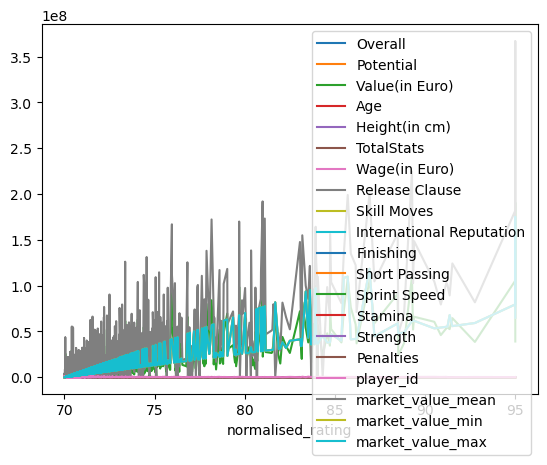

In [44]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.sort_values(by="normalised_rating", ascending=False)

# Plot the normalised_rating for each player
fifa23transfermarkt2022WC.plot(x="normalised_rating", kind="line")

# Show the plot
plt.show()

In [45]:
fifa23transfermarkt2022WC.head(5)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max,normalised_rating
46,Raphael Varane,84,85,39000000,CB,CB,France,https://cdn.sofifa.net/players/201/535/23_60.png,29,191,...,Raphael Varane,France,Defender,Centre-Back,1993-04-25,premier-league,64916666.0,64916666.0,64916666.0,95.00
4,Kylian Mbappe,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000.0,175000000.0,95.00
8,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,177,...,Joshua Kimmich,Germany,Midfield,Defensive Midfield,1995-02-08,bundesliga,79499999.0,79499999.0,79499999.0,95.00
78,Jose Maria Gimenez,83,85,38500000,CB,CB,Uruguay,https://cdn.sofifa.net/players/216/460/23_60.png,27,185,...,Jose Maria Gimenez,Uruguay,Defender,Centre-Back,1995-01-20,laliga,59187500.0,59187500.0,59187500.0,92.76
18,Aymeric Laporte,86,87,64500000,CB,CB,Spain,https://cdn.sofifa.net/players/212/218/23_60.png,28,191,...,Aymeric Laporte,Spain,Defender,Centre-Back,1994-05-27,premier-league,55791666.0,55791666.0,55791666.0,91.51


Add this value back in using playerid

# Preparing custom function for teams to play eachother

In [46]:
print(fifa23transfermarkt2022WC.columns)

Index(['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'TotalStats', 'Club Name', 'Wage(in Euro)',
       'Release Clause', 'Club Position', 'Club Jersey Number', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Finishing', 'Short Passing',
       'Sprint Speed', 'Stamina', 'Strength', 'Penalties', 'World Cup',
       'player_id', 'pretty_name_x', 'country_of_citizenship', 'position',
       'sub_position', 'date_of_birth', 'name', 'market_value_mean',
       'market_value_min', 'market_value_max', 'normalised_rating'],
      dtype='object')


##### Adding GoalKeepers to the Defence Grouping

In [47]:
fifa23transfermarkt2022WC["position"] = fifa23transfermarkt2022WC["position"].replace("Goalkeeper", "Defender")

#### Splitting every country into their own DataFrame

In [48]:
unique_countries = fifa23transfermarkt2022WC['country_of_citizenship'].unique()
unique_positions = fifa23transfermarkt2022WC['position'].unique()

In [49]:
print(unique_countries)
print(unique_positions)

['France' 'Germany' 'Uruguay' 'Spain' 'Senegal' 'Morocco' 'Canada'
 'England' 'Belgium' 'Croatia' 'Ghana' 'Argentina' 'Netherlands' 'Denmark'
 'Switzerland' 'Portugal' 'KoreaSouth' 'Cameroon' 'Poland' 'Wales'
 'UnitedStates' 'Japan' 'Mexico' 'Ecuador' 'Serbia' 'Tunisia' 'Iran'
 'Australia' 'Brazil' 'Qatar' 'CostaRica' 'SaudiArabia']
['Defender' 'Attack' 'Midfield']


In [50]:
# creating a dicttionary of each team split into seperate dataframes
WorldCupTeams = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_countries:
  for value2 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['country_of_citizenship'] == value1) & (fifa23transfermarkt2022WC['position'] == value2)]
    ## 28 Man Squad
    value_df = value_df.sort_values('normalised_rating', ascending=False).head(9)
    WorldCupTeams[(value1, value2)] = value_df

#sets a dataframe for each variation of country and each position

for key, value in WorldCupTeams.items():
  # Create a DataFrame with the same name as the key
  globals()["_".join(key)] = pd.DataFrame(value)

In [51]:
def play_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):

  team1country = team2_def_rating["country_of_citizenship"].unique()
  team1countrystr= ", ".join(team1country)
  team2country = team1_def_rating["country_of_citizenship"].unique()
  team2countrystr= ", ".join(team1country)

  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["normalised_rating"].mean() > team2_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["normalised_rating"].mean() - team2_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["normalised_rating"].mean() > team1_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["normalised_rating"].mean() - team1_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["normalised_rating"].mean() > team1_mid_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["normalised_rating"].mean() - team1_mid_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their Overall goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the overall of every player in team 1
    team1_def_rating["normalised_rating"] += 1
    team1_mid_rating["normalised_rating"] += 1
    team1_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the overall of every player in team 2
    team2_def_rating["normalised_rating"] -= 1
    team2_mid_rating["normalised_rating"] -= 1
    team2_att_rating["normalised_rating"] -= 1
    return team1countrystr+" wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the overall of every player in team 2
    team2_def_rating["normalised_rating"] += 1
    team2_mid_rating["normalised_rating"] += 1
    team2_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the overall of every player in team 1
    team1_def_rating["normalised_rating"] -= 1
    team1_mid_rating["normalised_rating"] -= 1
    team1_att_rating["normalised_rating"] -= 1
    return team2countrystr+" wins!"
  else:
    return "Draw!"

    


In [52]:
def play_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):


  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["Overall"].mean() > team2_def_rating["Overall"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["Overall"].mean() - team2_def_rating["Overall"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    #print(round(team1_att_rating["Overall"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["Overall"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["Overall"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["Overall"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["Overall"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["Overall"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["Overall"].mean() > team1_def_rating["Overall"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["Overall"].mean() - team1_def_rating["Overall"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["Overall"].mean() > team1_mid_rating["Overall"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["Overall"].mean() - team1_mid_rating["Overall"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    #print(round(team1_att_rating["Overall"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["Overall"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["Overall"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["Overall"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["Overall"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["Overall"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their Overall goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the overall of every player in team 1
    team1_def_rating["Overall"] += 1
    team1_mid_rating["Overall"] += 1
    team1_att_rating["Overall"] += 1
    
    # Subtract 1 from the overall of every player in team 2
    team2_def_rating["Overall"] -= 1
    team2_mid_rating["Overall"] -= 1
    team2_att_rating["Overall"] -= 1
    return "Team 1 wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the overall of every player in team 2
    team2_def_rating["Overall"] += 1
    team2_mid_rating["Overall"] += 1
    team2_att_rating["Overall"] += 1
    
    # Subtract 1 from the overall of every player in team 1
    team1_def_rating["Overall"] -= 1
    team1_mid_rating["Overall"] -= 1
    team1_att_rating["Overall"] -= 1
    return "Team 2 wins!"
  else:
    return "It's a draw!"

# Group Stages

## Group A
### Qatar, Ecuador, Senegal, The Netherlands

In [53]:
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack))
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Senegal_Defender,Senegal_Midfield,Senegal_Attack))
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack))
print(play_game(Senegal_Defender,Senegal_Midfield,Senegal_Attack,Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack))
print(play_game(Senegal_Defender,Senegal_Midfield,Senegal_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack))
print(play_game(Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack)) 
print('All games played')

Team 1 wins!
Team 1 wins!
It's a draw!
Team 2 wins!
Team 1 wins!
Team 1 wins!
All games played


## Group B
### England, Iran, USA, Wales

In [55]:
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,England_Defender,England_Midfield,England_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack,Wales_Defender,Wales_Midfield,Wales_Attack)) 
print('All games played')

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
Team 1 wins!
It's a draw!
All games played


## Group C
### Argentina, Saudi Arabia, Mexico, Poland

In [55]:
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,England_Defender,England_Midfield,England_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack,Wales_Defender,Wales_Midfield,Wales_Attack)) 
print('All games played')

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
Team 1 wins!
It's a draw!
All games played


## Group D
### France, Austrialia, Denmark, Tunisa

In [61]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
All games played


## Group E
### Spain, Costa Rica, Germany, Japan

In [61]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
All games played


## Group F
### Belgium, Canada, Morocco, Croatia

In [61]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
All games played


## Group G
### Brazil, Serbia, Switzerland, Cameroon

In [61]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
All games played


## Group H
### Portugal, Ghana, Uruguay, Korea Republic

In [61]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaSouth_Defender,KoreaSouth_Midfield,KoreaSouth_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 1 wins!
All games played


In [63]:
global_vars = globals()

# Iterate over the dictionary
for name, value in global_vars.items():
  # Check if the variable is a dataframe
  if isinstance(value, pd.DataFrame):
    # Print the name and value of the dataframe
    print(name)

_
__
___
valuations
players
competitions
clubs
_5
_6
joined
toptierplayers
grouped_multiple
players_avg_value_per_year
_11
WorldCupYears
players_avg_value_per_wc
_15
toptierplayers_per_wc
TopTier_2022_WC_Eligble_Players
_23
_26
_27
fifa23
_32
fifa23transfermarkt2022WC
value_df
Attack
nan
Goalkeeper
Midfield
Defender
_37
All_Positions_Normalised
_45
France_Defender
France_Attack
France_Midfield
Germany_Defender
Germany_Attack
Germany_Midfield
Uruguay_Defender
Uruguay_Attack
Uruguay_Midfield
Spain_Defender
Spain_Attack
Spain_Midfield
Senegal_Defender
Senegal_Attack
Senegal_Midfield
Morocco_Defender
Morocco_Attack
Morocco_Midfield
Canada_Defender
Canada_Attack
Canada_Midfield
England_Defender
England_Attack
England_Midfield
Belgium_Defender
Belgium_Attack
Belgium_Midfield
Croatia_Defender
Croatia_Attack
Croatia_Midfield
Ghana_Defender
Ghana_Attack
Ghana_Midfield
Argentina_Defender
Argentina_Attack
Argentina_Midfield
Netherlands_Defender
Netherlands_Attack
Netherlands_Midfield
Denmark_Defe